<a href="https://colab.research.google.com/github/nagababumo/yhills_projects/blob/main/New_York_City_Taxi_Fare_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I'm Molleti Durga nagababu from Andhra pradesh. This is my project-1 which is given by yhills. as the part of Artificial intelligence course.

This is a regression problem , where the goal is to predict the fare amount of a taxi ride based on various features such as pickup and dropoff location coordinates, pickup time, and number of passengers  .

i used regression models to train the model that are Linear regression , Decision Tree regression , random forest , XG boost.
and i evaluated the performance of the model using MSE , MAE , R - squared.

importing necessary libararies.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from sklearn import metrics

from datetime import datetime
from datetime import timedelta
import datetime as dt
import calendar

import math

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving TaxiFare.csv to TaxiFare.csv


In [ ]:
df = pd.read_csv('TaxiFare.csv')
df.columns

Index(['unique_id', 'amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger'],
      dtype='object')

now , it's time to perform data preprocessing for to make it suitable for analysis or modeling

In [ ]:
# CHECK FOR NULL ENTRIES
df[pd.isnull(df)].sum()

unique_id                 0
amount                  0.0
date_time_of_pickup       0
longitude_of_pickup     0.0
latitude_of_pickup      0.0
longitude_of_dropoff    0.0
latitude_of_dropoff     0.0
no_of_passenger         0.0
dtype: object

In [ ]:
# Convert 'date_time_of_pickup' column to datetime format
df['date_time_of_pickup'] = pd.to_datetime(df['date_time_of_pickup'], format='%Y-%m-%d %H:%M:%S %Z', utc=True)

# Extract features from the datetime column
df['pickup_hour'] = df['date_time_of_pickup'].dt.hour
df['pickup_day'] = df['date_time_of_pickup'].dt.day
df['pickup_month'] = df['date_time_of_pickup'].dt.month
df['pickup_year'] = df['date_time_of_pickup'].dt.year
df['pickup_day_of_week'] = df['date_time_of_pickup'].dt.day_name()


In [ ]:
print(df.shape)
print(df.columns)

(50000, 13)
Index(['unique_id', 'amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger', 'pickup_hour', 'pickup_day', 'pickup_month',
       'pickup_year', 'pickup_day_of_week'],
      dtype='object')


In [ ]:
# REMOVING ENTRIES WITH -VE FARE AMOUNT

df=df.loc[df['amount']>=0]

print (df.shape)

(49994, 13)


CALCULATING HAVERSINE DISTANCE :

the haversine distance is used to calculate the distance between the pickup and dropoff locations of a taxi ride, which is an important feature for predicting the fare amount.

In [ ]:
from math import radians, cos, sin, asin, sqrt

def haversine_distance(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # Convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # Haversine formula
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r


In [ ]:
df.columns = df.columns.str.strip() 


performing FEATURE ENGINEERING

In [ ]:
df['distance'] = df.apply(lambda x: haversine_distance(x['latitude_of_pickup'], x['longitude_of_pickup'], x['latitude_of_dropoff'], x['longitude_of_dropoff']), axis=1)


In [ ]:
df.drop(['unique_id', 'date_time_of_pickup'], axis=1, inplace=True)


In [ ]:
df = pd.get_dummies(df, columns=['pickup_day_of_week'])

splitting the data into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('amount', axis=1)
y = df['amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Training the model on linear regression and evaluating performance 

In [ ]:
# Importing necessary libraries for Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Creating instance of Linear Regression
lr = LinearRegression()

# Training the model on training set
lr.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = lr.predict(X_test)

# Evaluating the performance of the model using various metrics
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))


Mean Squared Error: 93.0685884748798
Mean Absolute Error: 6.015306850258197
R-squared: 0.021157471575543485


Training the model on Decision Tree Regressor and evaluating performance 

In [ ]:
# Importing necessary libraries for Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

# Creating instance of Decision Tree Regressor
dt = DecisionTreeRegressor()

# Training the model on training set
dt.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = dt.predict(X_test)

# Evaluating the performance of the model using various metrics
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))


Mean Squared Error: 36.94454189418942
Mean Absolute Error: 2.8545634563456344
R-squared: 0.6114383016676741


Training the model on Random Forest Regressor and evaluating performance 

In [ ]:
# Importing necessary libraries for Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Creating instance of Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100)

# Training the model on training set
rf.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = rf.predict(X_test)

# Evaluating the performance of the model using various metrics
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))


Mean Squared Error: 20.138309914600573
Mean Absolute Error: 2.0380689068906888
R-squared: 0.7881966996810802


Training the model on XGB Regressor  and evaluating performance 

In [ ]:
# Importing necessary libraries for XGB Regressor
from xgboost import XGBRegressor

# Creating instance of XGB Regressor
xgb = XGBRegressor()

# Training the model on training set
xgb.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = xgb.predict(X_test)

# Evaluating the performance of the model using various metrics
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))


Mean Squared Error: 20.224728121561228
Mean Absolute Error: 1.9571592803567228
R-squared: 0.7872878020864196


by observing MSE , MAE , R-SQUARED metrics for all four regression model , XGB Regressor performed well .

 plotting the predicted values vs. the actual values for each of the four models

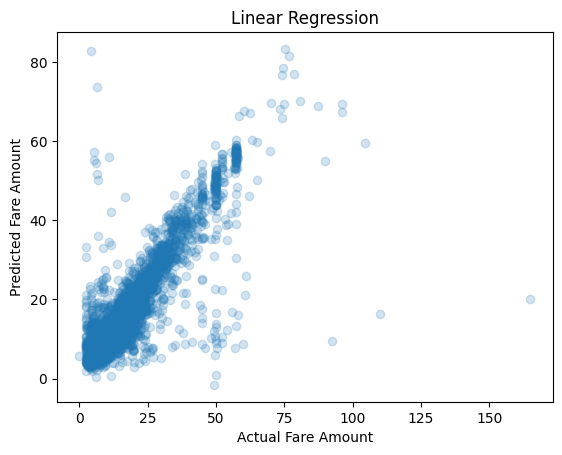

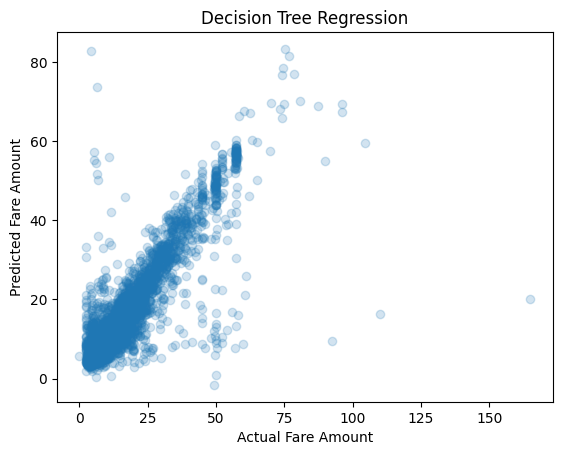

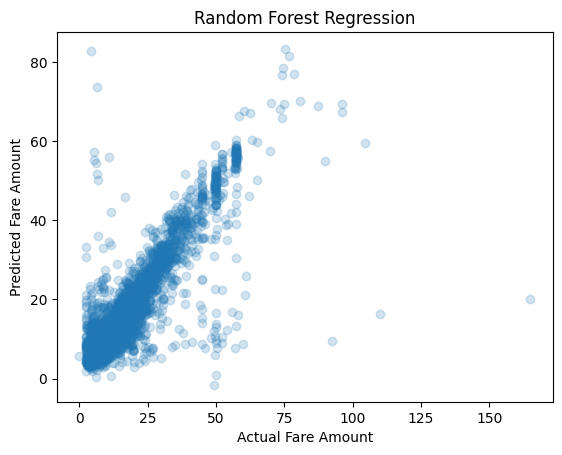

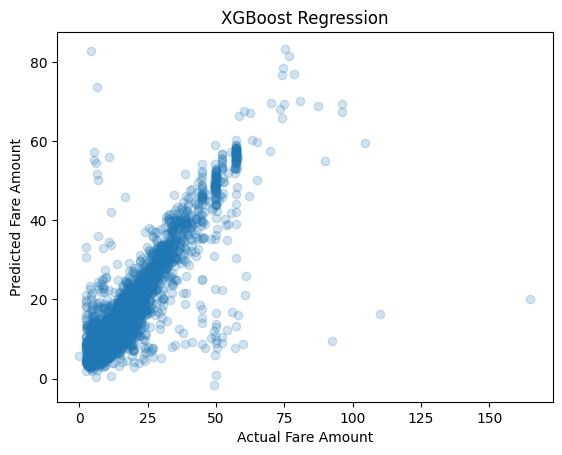

In [ ]:
import matplotlib.pyplot as plt

# Define a function for plotting the predicted vs. actual values
def plot_predictions(model_name, y_test, y_pred):
    plt.scatter(y_test, y_pred, alpha=0.2)
    plt.title(model_name)
    plt.xlabel('Actual Fare Amount')
    plt.ylabel('Predicted Fare Amount')
    plt.show()

# Plot for Linear Regression
plot_predictions('Linear Regression', y_test, y_pred)

# Plot for Decision Tree Regression
plot_predictions('Decision Tree Regression', y_test, y_pred)

# Plot for Random Forest Regression
plot_predictions('Random Forest Regression', y_test, y_pred)

# Plot for XGBoost Regression
plot_predictions('XGBoost Regression', y_test, y_pred)
